In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv("machine failure.csv")
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


Data Preprocessing

In [3]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [4]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [5]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
data.rename(columns= {'TWF': 'Tool Wear Failure',"HDF" : 'Head Dissipation Failure', 'PWF' : 'Power Failure', 'OSF' : 'Overstrain Failure', 'RNF' : 'Random Failures'}, inplace=True)
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
data = data.drop(['UDI', 'Product ID'], axis=1)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [8]:
data.rename(columns={'Type' : 'Quality Type'}, inplace = True)
data

,Quality Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [9]:
qual_map = {'L' : 'Low', 'M' : 'Medium', 'H' :'High'}
data['Quality Type'] = data['Quality Type'].map(qual_map)
data

,Quality Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures
0,Medium,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,Low,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,Low,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,Low,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,Low,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Medium,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,High,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,Medium,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,High,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [10]:
qual_map = {'Low' : -1, 'Medium' : 0, 'High' : 1}
data['Quality_Binary'] = data['Quality Type'].map(qual_map)
data

,Quality Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures,Quality_Binary
0,Medium,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0
1,Low,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,-1
2,Low,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,-1
3,Low,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,-1
4,Low,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Medium,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0
9996,High,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1
9997,Medium,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0
9998,High,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1


In [11]:
data.tail()

,Quality Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures,Quality_Binary
9995,Medium,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0
9996,High,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1
9997,Medium,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0
9998,High,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1
9999,Medium,299.0,308.7,1500,40.2,30,0,0,0,0,0,0,0


In [12]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures,Quality_Binary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190,-0.499700
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355,0.671301
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Quality Type              10000 non-null  object 
 1   Air temperature [K]       10000 non-null  float64
 2   Process temperature [K]   10000 non-null  float64
 3   Rotational speed [rpm]    10000 non-null  int64  
 4   Torque [Nm]               10000 non-null  float64
 5   Tool wear [min]           10000 non-null  int64  
 6   Machine failure           10000 non-null  int64  
 7   Tool Wear Failure         10000 non-null  int64  
 8   Head Dissipation Failure  10000 non-null  int64  
 9   Power Failure             10000 non-null  int64  
 10  Overstrain Failure        10000 non-null  int64  
 11  Random Failures           10000 non-null  int64  
 12  Quality_Binary            10000 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1015.8+ KB


In [14]:
data.shape

(10000, 13)

Data Analysis

['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Rotational speed [rpm]']


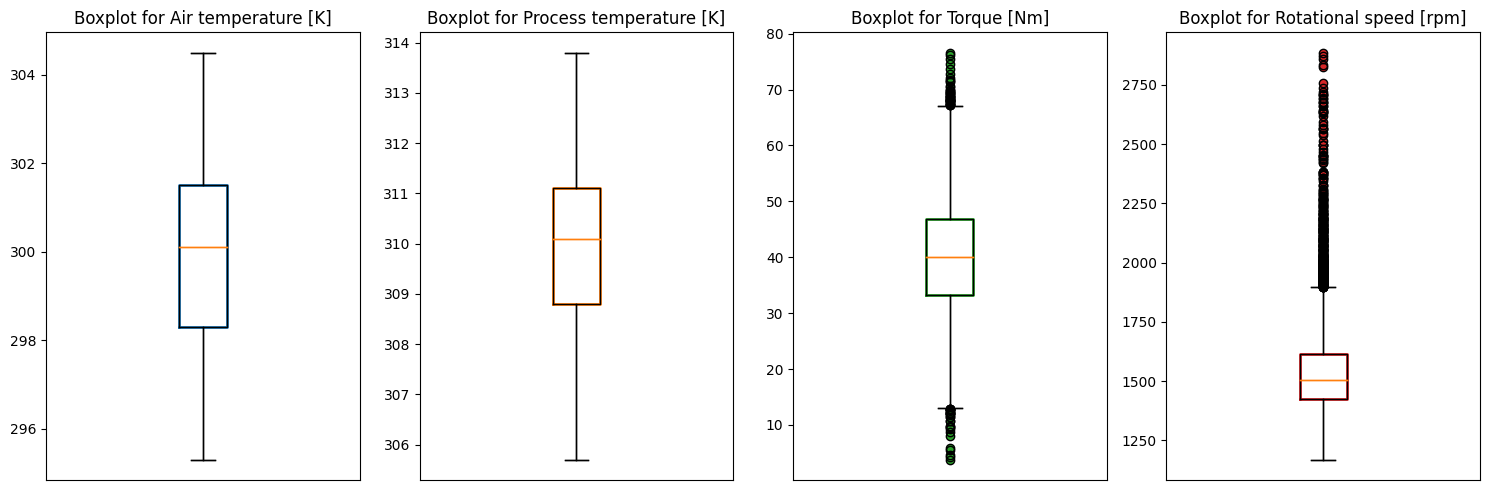

In [15]:
#Outlier Detection and removal
data = pd.DataFrame(data)
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist() + ['Rotational speed [rpm]']
# numerical_cols.append('Rotational speed [rpm]')
print(numerical_cols)

# Create a custom color palette for boxplots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']



fig, axes = plt.subplots(nrows = 1, ncols = len(numerical_cols), figsize = (15,5))

#Loop through nnumerical_cols and create boxplots 
for i, column in enumerate(numerical_cols): 
    ax = axes[i]

     # Customize boxplot appearance
    boxprops = dict(linewidth=2, color=colors[i])
    flierprops = dict(marker='o', markersize=6, markerfacecolor=colors[i], markeredgecolor='none')
    
    ax.boxplot(data[column], boxprops=boxprops, flierprops=flierprops)

    
    ax.boxplot(data[column])
    ax.set_title(f'Boxplot for {column}')
    ax.set_xticks([])

plt.tight_layout()
plt.show()

In [16]:
#Detecting outliers
from scipy import stats
# Define the z-score threshold (e.g., 3)
z_score_threshold = 3

# Create a mask to identify outliers for each numerical column
outlier_mask = np.abs(stats.zscore(data[numerical_cols])) > z_score_threshold

# Apply the mask to remove outliers from the DataFrame
data_no_outliers = data[~outlier_mask.any(axis=1)]

# Print the shape of the DataFrame before and after removing outliers
print("Original Data Shape:", data.shape)
print("Data Shape After Removing Outliers:", data_no_outliers.shape)

# Optionally, you can reset the index if needed
data_no_outliers.reset_index(drop=True, inplace=True)

Original Data Shape: (10000, 13)
Data Shape After Removing Outliers: (9822, 13)


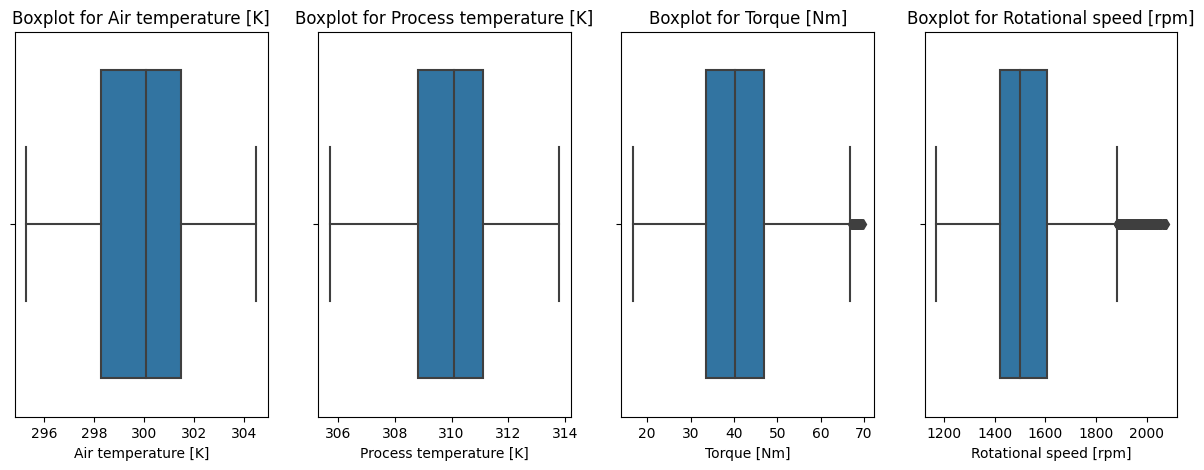

In [17]:
# Optionally, you can reset the index if needed
# data_no_outliers.reset_index(drop=True, inplace=True)

# Plot boxplots for numerical columns in data_no_outliers
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=data_no_outliers[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')


In [18]:
data_no_outliers.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures,Quality_Binary
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000
mean,300.001161,310.002861,1526.222765,40.350713,107.912441,0.029831,0.004480,0.011708,0.005192,0.009672,0.001934,-0.499593
std,1.998035,1.482233,147.382767,9.448740,63.616929,0.170130,0.066784,0.107576,0.071875,0.097875,0.043942,0.671583
min,295.300000,305.700000,1168.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,298.300000,308.800000,1422.000000,33.600000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,300.100000,310.100000,1500.000000,40.200000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,301.500000,311.100000,1606.000000,46.900000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.500000,313.800000,2076.000000,69.700000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
data = data_no_outliers

In [20]:
data

,Quality Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Head Dissipation Failure,Power Failure,Overstrain Failure,Random Failures,Quality_Binary
0,Medium,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0
1,Low,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,-1
2,Low,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,-1
3,Low,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,-1
4,Low,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,Medium,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0
9818,High,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1
9819,Medium,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0
9820,High,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1


Feature Importance in the Dataset

In [21]:
data.columns

Index(['Quality Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Tool Wear Failure', 'Head Dissipation Failure',
       'Power Failure', 'Overstrain Failure', 'Random Failures',
       'Quality_Binary'],
      dtype='object')

In [30]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
X = data.drop(['Machine failure', 'Quality Type'], axis=1)
y = data['Machine failure']

In [31]:
X.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Tool Wear Failure', 'Head Dissipation Failure', 'Power Failure',
       'Overstrain Failure', 'Random Failures', 'Quality_Binary'],
      dtype='object')

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Air temperature [K]       9822 non-null   float64
 1   Process temperature [K]   9822 non-null   float64
 2   Rotational speed [rpm]    9822 non-null   int64  
 3   Torque [Nm]               9822 non-null   float64
 4   Tool wear [min]           9822 non-null   int64  
 5   Tool Wear Failure         9822 non-null   int64  
 6   Head Dissipation Failure  9822 non-null   int64  
 7   Power Failure             9822 non-null   int64  
 8   Overstrain Failure        9822 non-null   int64  
 9   Random Failures           9822 non-null   int64  
 10  Quality_Binary            9822 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 844.2 KB


In [33]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [34]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [36]:
model.fit(X, y)

RandomForestClassifier()

In [40]:
#Get feature importance from the trained mmodel
feature_importance = model.feature_importances_
feature_importance

array([2.07506225e-02, 1.43808631e-02, 3.75407208e-02, 7.51327823e-02,
       4.66449261e-02, 1.29783416e-01, 3.42184822e-01, 1.01555714e-01,
       2.27190008e-01, 3.31725977e-04, 4.50439814e-03])

In [42]:
# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df

,Feature,Importance
0,Air temperature [K],0.020751
1,Process temperature [K],0.014381
2,Rotational speed [rpm],0.037541
3,Torque [Nm],0.075133
4,Tool wear [min],0.046645
5,Tool Wear Failure,0.129783
6,Head Dissipation Failure,0.342185
7,Power Failure,0.101556
8,Overstrain Failure,0.227190
9,Random Failures,0.000332


In [44]:
# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
6,Head Dissipation Failure,0.342185
8,Overstrain Failure,0.227190
5,Tool Wear Failure,0.129783
7,Power Failure,0.101556
3,Torque [Nm],0.075133
4,Tool wear [min],0.046645
2,Rotational speed [rpm],0.037541
0,Air temperature [K],0.020751
1,Process temperature [K],0.014381
10,Quality_Binary,0.004504


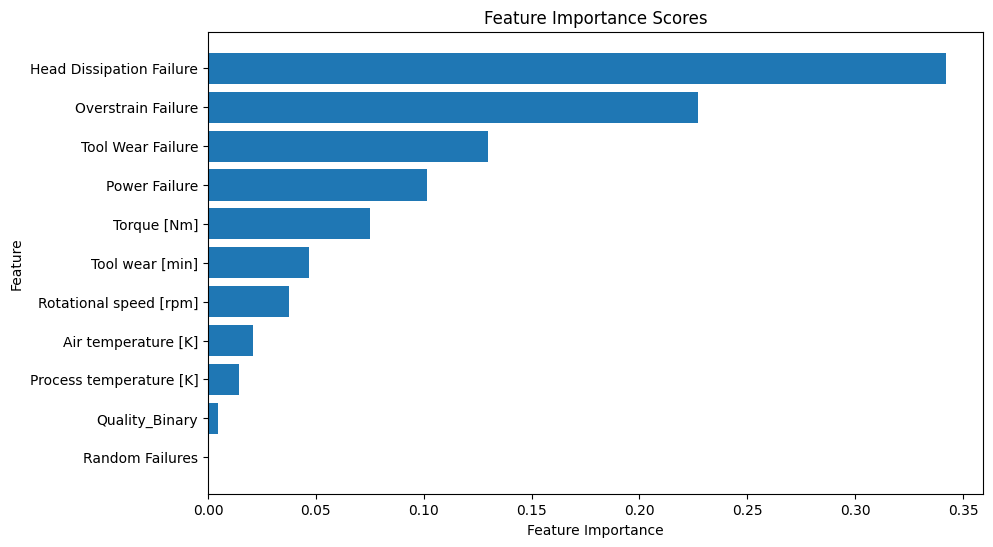

In [45]:
# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [46]:
data.columns

Index(['Quality Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Tool Wear Failure', 'Head Dissipation Failure',
       'Power Failure', 'Overstrain Failure', 'Random Failures',
       'Quality_Binary'],
      dtype='object')

In [51]:
# Sort importance_df to get the top 8 important features
top_features = importance_df.nlargest(8, 'Importance')['Feature']

# Create a new DataFrame with the top 8 features and the target variable 'Machine Failures'
new_data = data[list(top_features) + ['Machine failure'] + ['Quality_Binary']] 
new_data

,Head Dissipation Failure,Overstrain Failure,Tool Wear Failure,Power Failure,Torque [Nm],Tool wear [min],Rotational speed [rpm],Air temperature [K],Machine failure,Quality_Binary
0,0,0,0,0,42.8,0,1551,298.1,0,0
1,0,0,0,0,46.3,3,1408,298.2,0,-1
2,0,0,0,0,49.4,5,1498,298.1,0,-1
3,0,0,0,0,39.5,7,1433,298.2,0,-1
4,0,0,0,0,40.0,9,1408,298.2,0,-1
...,...,...,...,...,...,...,...,...,...,...
9817,0,0,0,0,29.5,14,1604,298.8,0,0
9818,0,0,0,0,31.8,17,1632,298.9,0,1
9819,0,0,0,0,33.4,22,1645,299.0,0,0
9820,0,0,0,0,48.5,25,1408,299.0,0,1


In [58]:
len(data.columns)

13

In [59]:
len(new_data.columns)

10

In [60]:
# Get the set of columns in the original data DataFrame
data_columns = set(data.columns)

# Get the set of columns in the new_data DataFrame
new_data_columns = set(new_data.columns)

In [61]:
# Find the columns that are in 'data' but not in 'new_data'
columns_not_in_new_data = data_columns - new_data_columns

# Now, 'columns_not_in_new_data' contains the columns that are in 'data' but not in 'new_data'
print("Columns not in new_data:", columns_not_in_new_data)

Columns not in new_data: {'Random Failures', 'Quality Type', 'Process temperature [K]'}


Multivariate Analysis
- Multivariate Analysis involves exploring relationships between multiple variables simultaneously.
Steps -
- Standardize the data
- Apply PCA
- Select number of Components
- Transform Data
- Visualization

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data.drop('Machine failure', axis=1))

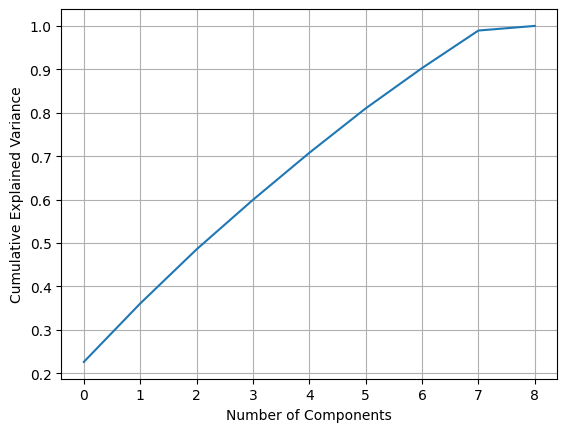

In [64]:
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Plot explained variance to decide the number of components
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [65]:
from sklearn.decomposition import PCA

# Assuming you have a dataset named 'scaled_data' and 'y' as your target variable

# Create a function to visualize reduced dimensions
def visualize_pca_components(components, labels):
    pca = PCA(n_components=components)
    pca_result = pca.fit_transform(scaled_data)

    # Create a scatter plot of the first two principal components
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette="viridis")
    plt.title(f'PCA Components {components}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Target', loc='best')
    plt.show()



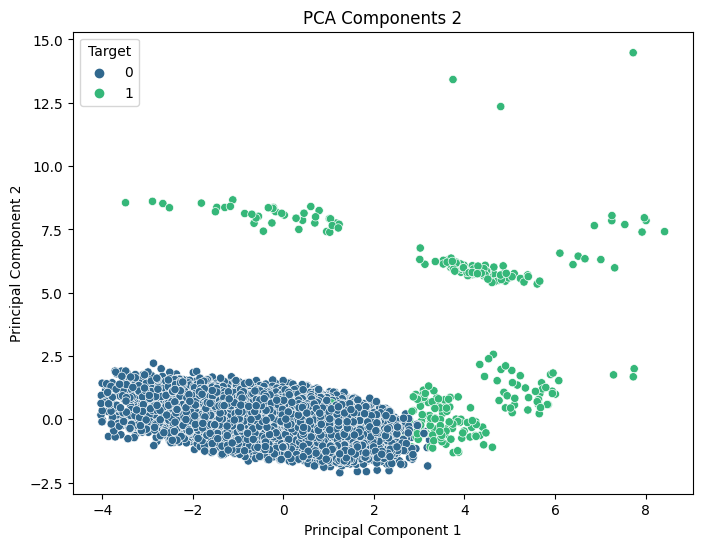

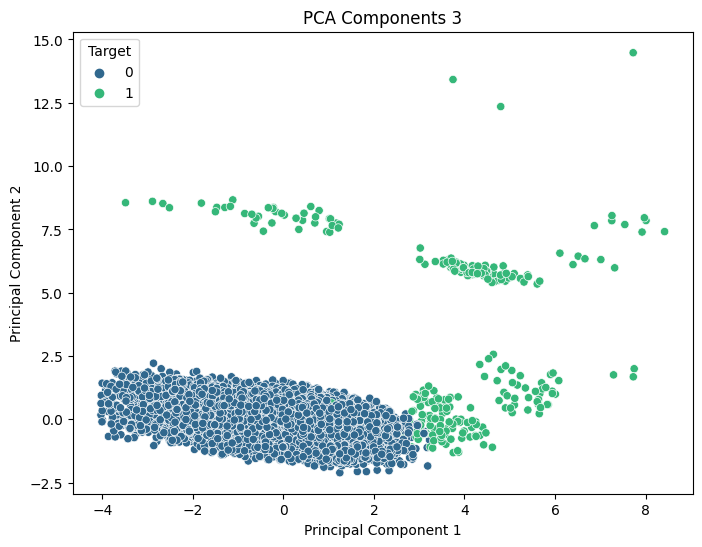

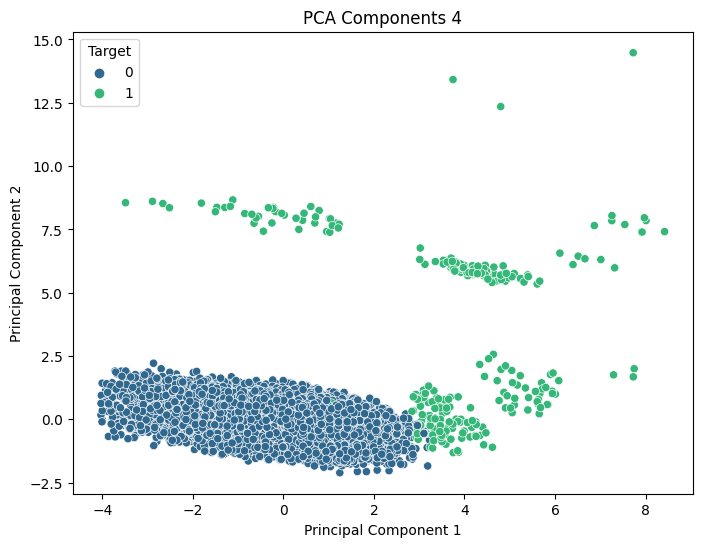

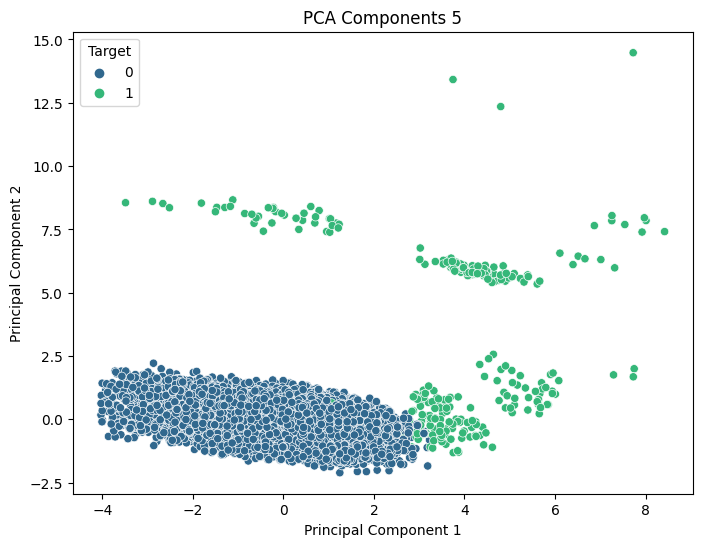

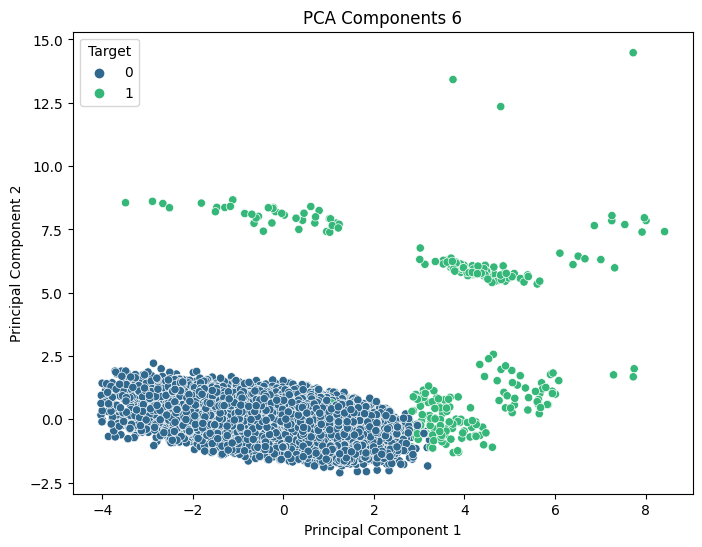

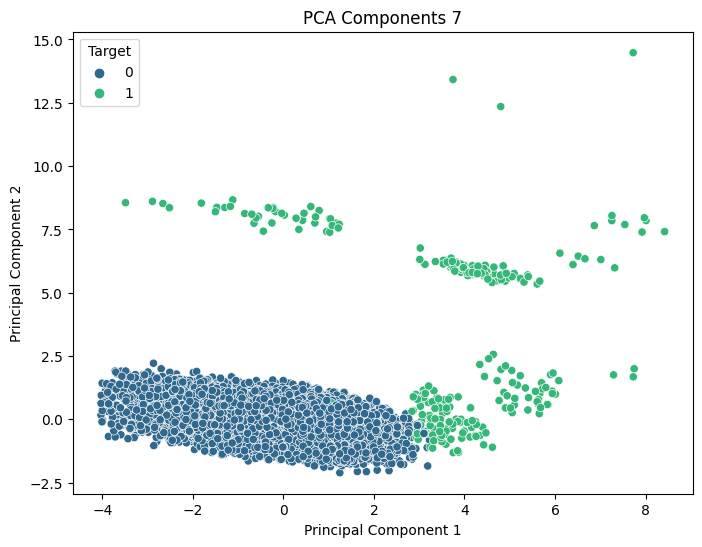

In [67]:
# Call the function with different numbers of components
visualize_pca_components(2, y)  # Visualize with 2 components
visualize_pca_components(3, y)  # Visualize with 3 components
visualize_pca_components(4, y)  # Visualize with 4 components
visualize_pca_components(5, y)
visualize_pca_components(6, y)
visualize_pca_components(7, y)

In [69]:
# Apply PCA
pca = PCA(n_components=7)  # Choose the number of components you want to retain
pca_result = pca.fit_transform(scaled_data)
pca_result

array([[-0.06960303, -1.43007683, -0.70784679, ...,  0.58585201,
         0.31328833,  0.64121409],
       [ 0.83414652, -1.36355164, -0.58063326, ..., -0.38344926,
         0.91343419,  0.4224668 ],
       [ 0.65875132, -1.2900605 , -0.60034887, ..., -0.30771422,
         0.88917705,  0.48714783],
       ...,
       [-1.13026506, -0.93171705, -0.28549213, ...,  0.76713283,
         0.13257012,  0.51598165],
       [ 0.94764774, -1.57035252, -0.71710542, ...,  1.0566524 ,
        -0.33378582,  0.16785075],
       [-0.01100348, -1.09099993, -0.42095047, ...,  0.48830018,
         0.1484816 ,  0.30929213]])

Applying KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result, y, test_size=0.2, random_state=42)

In [72]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled.shape

(7857, 7)

Search for optimal number of Neighbors

In [81]:
from sklearn.model_selection import GridSearchCV
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()
# Define a range of 'k' values to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [82]:
# Get the best 'k' value from the grid search
best_k = grid_search.best_params_['n_neighbors']
best_k

3

In [83]:
# Initialize and train the KNN classifier (you can choose the number of neighbors 'n_neighbors')
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier

KNeighborsClassifier(n_neighbors=3)

In [84]:
# Train the classifier on your data
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# Make predictions on test data
y_pred = knn_classifier.predict(X_test_scaled)

In [86]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k=3: {accuracy}')

Accuracy with k=3: 0.9994910941475827


Checking other Accuracy measures and Scores

In [87]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [88]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1905    0]
 [   1   59]]


In [89]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 1.0000
Recall: 0.9833
F1-Score: 0.9916


In [90]:
# Calculate ROC curve and AUC
y_prob = knn_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.4f}')


ROC AUC: 0.9916


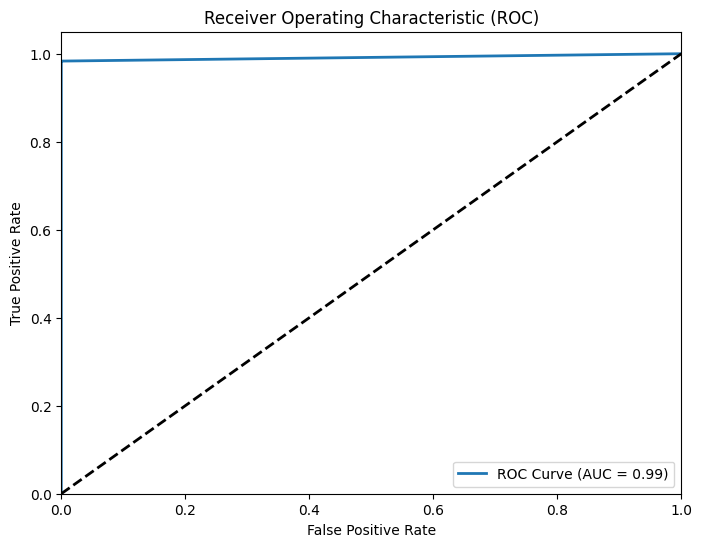

In [91]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [92]:
# Perform cross-validation (5-fold in this example)
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean():.4f}')

Cross-Validation Scores: [0.99936387 0.99745547 0.99936346 0.99936346 0.99936346]
Average Cross-Validation Score: 0.9990


Applyin Support-Vector Machines in this Dataset

In [94]:
from sklearn.svm import SVC

# Initialize the SVM classifier with the RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier

SVC(random_state=42)

In [95]:
# Fit the SVM model to the training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9994910941475827
Confusion Matrix:
 [[1905    0]
 [   1   59]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1905
           1       1.00      0.98      0.99        60

    accuracy                           1.00      1965
   macro avg       1.00      0.99      1.00      1965
weighted avg       1.00      1.00      1.00      1965



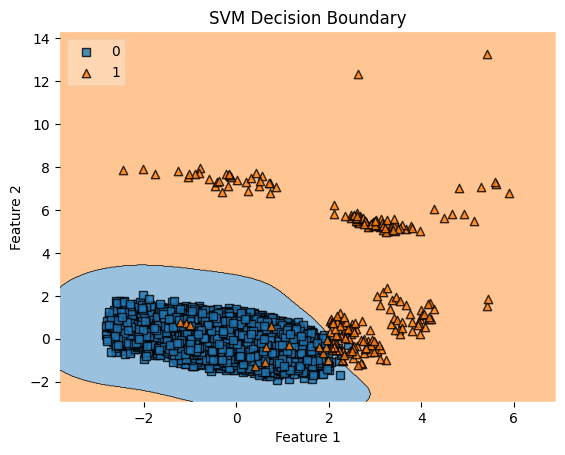

In [101]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Plot decision boundary for a subset of features (assuming X_train has only two features)
svm_classifier.fit(X_train_scaled[:, :2], y_train)  # Re-fit on the first two features

# Create a meshgrid of points for visualization
plot_decision_regions(X_train_scaled[:, :2], y_train, clf=svm_classifier, legend=2)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()